**파일업로드 하기** 

In [1]:
#파일 직접 업로드하기
#from google.colab import files
#myfile = files.upload()

#df = pd.read_csv(io.BytesIO(myfile['vgames2.csv']), encoding = 'utf-8')   # encoding인자에 한글 전용 인코딩 방식

**라이브러리 및 데이터 불러오기**



In [1]:
#라이브러리 불러오기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#read data as df
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
del df['Unnamed: 0'] # Unnamed: 32 열 삭제

In [3]:
#한글 나눔 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,660 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160980 files and d

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 


In [4]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


Platform-게임 출시 플랫폼

Year-게임 출시 연도

Genre-게임 장르

Publisher -게임 게시자

NA_Sales-북미 지역 판매 (백만 단위)

EU_Sales-유럽 판매 (백만 단위)

JP_Sales-일본에서의 판매 (백만 단위)

Other_Sales-전 세계 판매 (백만 단위)

In [5]:
df.shape
# 16598 행 / 9 열

(16598, 9)

In [6]:
df.info()          # 데이터 type 확인
df.isnull().sum()  # 결측치 개수 확인



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

# 결측치 개수

Year 271개

Genre 50개

Publusher 58개




# sales는 object로 구성되어있다.
(실수형일 줄 알았는데 아니였다. K,M 문자가 있는거 보면 심상치 않다.)

In [7]:
print(df.describe())# 요약통계량 확인

               Year
count  16327.000000
mean    1994.242543
std      155.077168
min        0.000000
25%     2003.000000
50%     2007.000000
75%     2010.000000
max     2020.000000


In [8]:
#null_data = df[df.isnull().any(axis=1)] # 결측치 있는 행 선택
#df[df['Year'].isnull()] # Year 결측치
#df[df['Genre'].isnull()] # Genre 결측치
#df[df['Platform'].isnull()]

In [3]:
sub_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']]
sub_sales # 판매량 따로 

# 아래의 과정을 위해 지역별 판매량 df를 따로 분리한다.
# 그 후에 K,M이 들어간 것을 지우고 object를 float으로 형 변환을 한다. 
# 그 후 기존에 있던 판매량을 drop을 사용하여 없애고 새롭게 만든 판매량을 concat으로 합친다.

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
...,...,...,...,...
16593,0.15,0.04,0,0.01
16594,0.01,0,0,0
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [4]:
def fuction(x): # 함수설정 M이들어가면 지우고 K가 들어가면 지우고 0.001을 곱해라 . 전부 실수형으로 바꿔주고 
  if 'M' in x :
    return (float(x.replace('M','')))
  elif 'K' in x :
    return (float(x.replace('K','')))*0.001
  else :
    return float(x)   

In [5]:
sub_NA_Sales= sub_sales["NA_Sales"].apply(lambda x : fuction(x))
sub_EU_Sales= sub_sales["EU_Sales"].apply(lambda x : fuction(x))
sub_JP_Sales= sub_sales["JP_Sales"].apply(lambda x : fuction(x))
sub_Other_Sales= sub_sales["Other_Sales"].apply(lambda x : fuction(x))

In [6]:
new_sales = pd.concat([sub_NA_Sales, sub_EU_Sales, sub_JP_Sales, sub_Other_Sales], axis=1)
new_sales.info()
# dtype를 보면 float으로 변경되었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     16598 non-null  float64
 1   EU_Sales     16598 non-null  float64
 2   JP_Sales     16598 non-null  float64
 3   Other_Sales  16598 non-null  float64
dtypes: float64(4)
memory usage: 518.8 KB


In [7]:
df2 = df.drop(['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales'], axis = 1) # 기존에 있던 지역별 sales 열 삭제
df2

,Name,Platform,Year,Genre,Publisher
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher
...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei


In [8]:
new_df = pd.concat([df2, new_sales], axis=1)  # df에 새롭게 만든 new_sales 열을 추가하여 new_df를 만들어줌.
new_df.info()

# dtype를 보면 float으로 변경되었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [9]:
new_df["total_sales"] = (new_df['NA_Sales'] + new_df['EU_Sales'] + new_df['JP_Sales'] + new_df['Other_Sales']).round(2)  # 지역별 판매량 총 합을 나타내는 sales 열 만들기. ()
print(new_df.head())
df

                                             Name  ... total_sales
0                    Candace Kane's Candy Factory  ...        0.04
1                                  The Munchables  ...        0.18
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        0.02
3                Deal or No Deal: Special Edition  ...        0.04
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.25

[5 rows x 10 columns]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [10]:
sort_total_sales_new_df = new_df.sort_values(['total_sales'], ascending=False)  # 지역별 판매량 총 합인 total_sales를 내림차순해준다.
sort_total_sales_new_df.head()

# 내림차순을 하기 위한 방법 .sort_index()
# df_sorted_by_index = df.sort_index(ascending=False) 
# ascending=False 내림차순으로 정렬


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [11]:
print(sort_total_sales_new_df) # overall_sales 열을 내림차순으로 바꿔줌 (전체 데이터값 순서도 바뀜)

                                                    Name  ... total_sales
2908                                          Wii Sports  ...       82.74
4199                                   Super Mario Bros.  ...       40.24
12579                                     Mario Kart Wii  ...       35.83
3352                                   Wii Sports Resort  ...       33.00
7829                            Pokemon Red/Pokemon Blue  ...       31.38
...                                                  ...  ...         ...
14265         Nitroplus Blasterz: Heroines Infinite Duel  ...        0.01
2311   Shinseiki Evangelion: Koutetsu no Girlfriend 2...  ...        0.01
11376                                     Rail Simulator  ...        0.01
3571                         Hyperdimension Neptunia mk2  ...        0.01
5598    SCORE International Baja 1000: The Official Game  ...        0.00

[16598 rows x 10 columns]


In [12]:
df_drop_nan = sort_total_sales_new_df.dropna()  # NaN 값을 없애준 df_del_nan을 만들어줌 # 굳이 NaN을 바꾼 이유는 내림차순으로 상위 데이터를 본 결과 nan값이 없어서 없앰.
print(df_drop_nan)

                                                    Name  ... total_sales
2908                                          Wii Sports  ...       82.74
4199                                   Super Mario Bros.  ...       40.24
12579                                     Mario Kart Wii  ...       35.83
3352                                   Wii Sports Resort  ...       33.00
7829                            Pokemon Red/Pokemon Blue  ...       31.38
...                                                  ...  ...         ...
14265         Nitroplus Blasterz: Heroines Infinite Duel  ...        0.01
2311   Shinseiki Evangelion: Koutetsu no Girlfriend 2...  ...        0.01
11376                                     Rail Simulator  ...        0.01
3571                         Hyperdimension Neptunia mk2  ...        0.01
5598    SCORE International Baja 1000: The Official Game  ...        0.00

[16241 rows x 10 columns]


In [13]:
df_drop_nan.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,0.265195,0.147378,0.078283,0.048234,0.539091
std,155.484265,0.822431,0.508340,0.309272,0.189678,1.563905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [20]:
#Year 값 결측치 처리#


#최소 0년부터 2020년까지 있다.

#최초의 비디오 게임은 1950년대 초에 등장

##year에 0~16까지 있고 86,94,95, 96,97,98이 있다.
#이 값들의 의미는 분명 있을 것이다.알아보자.


 최초의 비디오 게임은 1950년대 초에 등장
1980년대 이후로, 비디오 게임은 대중적인 형태의 엔터테인먼트이자 현대 대중문화의 일부로 되었다. 
아케이드 게임의 황금기는 1978~1982년


# 세대별 플랫폼
1세대 -마그나북스 오디세이, 아타리 퐁

2세대 -마그나북스 오디세이2, 아타리 2600, 인텔리비전, 카세트비전

3세대(83~95년) -패밀리 컴퓨터, 아타리 7800, 세가 마크Ⅲ, 슈퍼카세트비전, 재믹스

4세대(87~95년) -슈퍼 패미컴, 메가 드라이브, CD-i, 네오지오, PC엔진

5세대(1993~2006년) -닌텐도64, 세가 새턴, 플레이스테이션, 아타리 재규어, PC-FX, 3DO

6세대(1998~2013년) -게임큐브, 드림캐스트, 플레이스테이션2, 엑스박스

7세대 -Wii, 플레이스테이션3, 엑스박스360

8세대 -Wii U, 플레이스테이션4, 엑스박스 원, 닌텐도 스위치

https://ko.wikipedia.org/wiki/%EB%B9%84%EB%94%94%EC%98%A4_%EA%B2%8C%EC%9E%84%EC%9D%98_%EC%97%AD%EC%82%AC#2%EC%84%B8%EB%8C%80_%EC%BD%98%EC%86%94_(1976~1992%EB%85%84)

In [14]:
df_drop_nan.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [15]:
# year가 0~16년 사이에 있는 값은 2000년대 출시한 플랫폼이다.
# 86~98년 사이에 있는 값은 1990년대 출시한 플랫폼이다.

# 20이하는 2000을 더해준다.  20보다 크고 100 이하는 1900을 더해줘서 1900년대로 맞춰준다.
def set (x): #30년 이하는 2000년도 발행일테고 30년 이상은 1900년 발행일 것이다. - 왜냐하면 6.25 이전에는 비디오 게임이 안나왔으니까! #사실 밑에서 확인가능 
    if x < 30 :
        return x + 2000
    elif x >= 30 and x < 100 :
        return x + 1900
    else:
        return x

In [16]:
df_drop_nan1 = df_drop_nan["Year"].apply(lambda x : set(x)) # 기존에 있던 df_drop_nan에 있던 Year 열의 값에 함수를 적용한 것을 df_drop_nan1에 지정해준다.
df_drop_nan1.mean() 

2006.4067483529338

In [17]:
a = df_drop_nan.drop(['Year'], axis = 1)  # df_drop_nan.drop를 a로 지정하고 함수에 적용한 결측치를 제거한 Year열을 기존에 있던 df_drop_nan1에 추가를 한다.

In [18]:
df_add_new_year = pd.concat([df_drop_nan1, a], axis = 1)
df_add_new_year.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.265195,0.147378,0.078283,0.048234,0.539091
std,5.832087,0.822431,0.508340,0.309272,0.189678,1.563905
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [19]:
data = df_add_new_year # 데이터 전처리 완룐ata = df_add_new_year # 데이터 전처리 완료
data

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,2006.0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,1985.0,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,2008.0,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,2009.0,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,1996.0,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
14265,2015.0,Nitroplus Blasterz: Heroines Infinite Duel,PS3,Fighting,Nitroplus,0.00,0.00,0.01,0.00,0.01
2311,2009.0,Shinseiki Evangelion: Koutetsu no Girlfriend 2...,PSP,Adventure,CyberFront,0.00,0.00,0.01,0.00,0.01
11376,2007.0,Rail Simulator,PC,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,0.01
3571,2011.0,Hyperdimension Neptunia mk2,PS3,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01


In [20]:
data.isnull().sum() # 전체data에 결측치가 0인 것을 확인하였다.
# 데이터 전처리 완료

Year           0
Name           0
Platform       0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
total_sales    0
dtype: int64

In [21]:
data.shape
#
# 기존 df (16598, 9) 인데 데이터 전처리 하니까 (16241, 10) 변경됨
# 행 값 257개 없애버림

(16241, 10)

# 1. 지역에 따라 선호하는 게임 장르가 다를까?

가정 - 수익이 높으면 선호도가 높을 것이다.

귀무가설 : 지역과 선호장르는 관련이 없다.

대립가설 : 지역과 선호장르는 관련이 있다.



In [27]:
data

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,2006.0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,1985.0,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,2008.0,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,2009.0,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,1996.0,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
14265,2015.0,Nitroplus Blasterz: Heroines Infinite Duel,PS3,Fighting,Nitroplus,0.00,0.00,0.01,0.00,0.01
2311,2009.0,Shinseiki Evangelion: Koutetsu no Girlfriend 2...,PSP,Adventure,CyberFront,0.00,0.00,0.01,0.00,0.01
11376,2007.0,Rail Simulator,PC,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,0.01
3571,2011.0,Hyperdimension Neptunia mk2,PS3,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01


In [30]:
# 지역과 선호장르의 관계를 파악하기 위해 카이제곱을 통해 P-value 값을 구한 후 유의수준을 확인하고 귀무가설 채택 및 기각을 결정한다.
# 유의수준만 보고 판단하는 것이 아닌 

In [31]:
# df.loc[[행],[열]]  
# df.loc[:,['year','pop']] # 모든 행(:), year, pop Column


In [32]:
# 가정 : 수익이 높으면 선호도가 높을 것이다.
# 귀무가설 : 지역과 선호장르는 관련이 없다. 
# 대안가설 : 지역과 선호장르는 관련이 있다.

In [22]:
from scipy.stats import chi2_contingency
Genre = data.groupby(['Genre']).sum().loc[:, 'NA_Sales':'total_sales']
chi2_contingency(Genre,correction=False) 

# P_value가 유의수준보다 더 크다. 귀무가설 채택 
# 지역과 선호장르는 관련이 없다.
# 다른 말로 표현하면 지역 별로 선호하는 장르는 다 다를 수도 있다고 표현한다. 꼭 선호장르가 같다고는 할 수 없다.

# 인덱스 슬라이싱 참고한 블로그 https://mellowlee.tistory.com/entry/Pandas-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%B6%94%EC%B6%9C%ED%96%89-Row-iloc-loc

(684.3363405169148,
 8.63692005591903e-116,
 44,
 array([[ 842.66837143,  468.29974503,  248.7462714 ,  153.26561214,
         1712.98      ],
        [ 115.12174823,   63.97710792,   33.98265154,   20.93849231,
          234.02      ],
        [ 218.19118114,  121.25633043,   64.40759449,   39.68489393,
          443.54      ],
        [ 383.55878598,  213.15678595,  113.22226051,   69.76216756,
          779.7       ],
        [ 407.31414544,  226.35845479,  120.23457673,   74.08282303,
          827.99      ],
        [ 118.42260683,   65.81150838,   34.95702805,   21.53885674,
          240.73      ],
        [ 355.44491575,  197.53294304,  104.92336069,   64.64878052,
          722.55      ],
        [ 443.48093003,  246.45757869,  130.91060674,   80.66088454,
          901.51      ],
        [ 504.10653576,  280.14930922,  148.80660697,   91.68754804,
         1024.75      ],
        [ 191.49899218,  106.42256462,   56.52835908,   34.83008412,
          389.28      ],
        [ 6

In [ ]:
# 귀무가설 채택. p value가 0과 비슷하다

In [23]:
# 지역별 sales 비율 확인하는 코드 ( 각 지역의 전체 sales를 total 매출에 차지하는 비율을 알아보고자 한다.)
print('NA_Sales 총합은' , data['NA_Sales'].sum(), '이다.','전체 sales 총합에서 차지하는 비율은', (data['NA_Sales'].sum()/data['total_sales'].sum()).round(2)*100,'%이다')
print('EU_Sales 총합은' , data['EU_Sales'].sum(), '이다.','전체 sales 총합에서 차지하는 비율은', (data['EU_Sales'].sum()/data['total_sales'].sum()).round(2)*100,'%이다')
print('JP_Sales 총합은' , data['JP_Sales'].sum(), '이다.','전체 sales 총합에서 차지하는 비율은', (data['JP_Sales'].sum()/data['total_sales'].sum()).round(2)*100,'%이다')
print('Other_Sales 총합은' , data['Other_Sales'].sum().round(2), '이다.','전체 sales 총합에서 차지하는 비율은', (data['Other_Sales'].sum()/data['total_sales'].sum()).round(2)*100,'%이다')


# 이거를 시각화하는데 파이차트로 하자

NA_Sales 총합은 4307.04 이다. 전체 sales 총합에서 차지하는 비율은 49.0 %이다
EU_Sales 총합은 2393.57 이다. 전체 sales 총합에서 차지하는 비율은 27.0 %이다
JP_Sales 총합은 1271.39 이다. 전체 sales 총합에서 차지하는 비율은 15.0 %이다
Other_Sales 총합은 783.37 이다. 전체 sales 총합에서 차지하는 비율은 9.0 %이다


In [35]:
#미국 49%, 유럽 27%, 일본 15%, 기타 9% 비율이다.

#미국과 유럽의 비중이 높으며 비디오 게임은 미국에서 가장 많이 한다.

In [42]:
# 전체 판매량에서 지역별 장르의 비율을 알아보고자 한다.
Genre = data.groupby(['Genre']).sum().loc[:, 'NA_Sales':'total_sales'] # 장르를 기준으로 각 지역 sales를 전체 판매량에서 지역별 장르의 비율을 알아보고자 한다.
Genre['NA_Sales'] = Genre['NA_Sales']/Genre['total_sales']
Genre['EU_Sales'] = Genre['EU_Sales']/Genre['total_sales']
Genre['JP_Sales'] = Genre['JP_Sales']/Genre['total_sales']
Genre['Other_Sales'] = Genre['Other_Sales']/Genre['total_sales'] 


Text(0.5, 1.0, 'Area Genre')

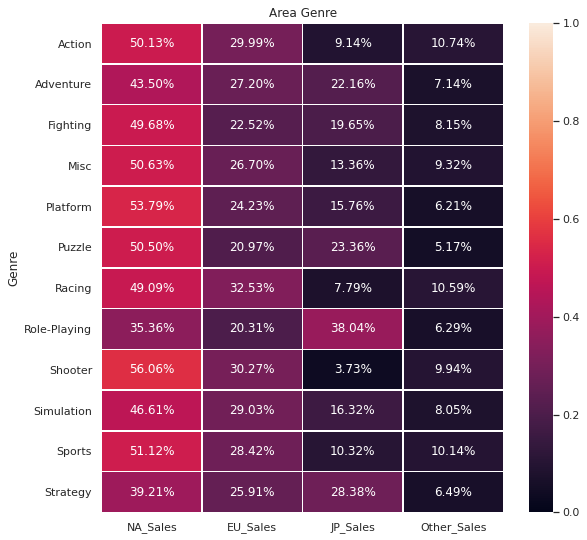

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# heatmap을 이용하면 두 개의 카테고리 값에 대한 값 변화를 한 눈에 알기 쉽다.
plt.subplots(figsize=(9, 9))
sns.heatmap(Genre.loc[:,'NA_Sales':'Other_Sales'],# Genre 전체 형 활용해서 sales열 추출함
            vmax =1, #최댓값 = 1
            vmin=0, #최솟값 = 0
            annot=True, #각 cell의 값 표기 유무한다는 의미
            fmt = '.2%',# 소수 2번째 짜리까지 나타냄
            linewidths=.5  # cell 사이에 경계선 추가
            ) 
plt.title("Area Genre")

# heatmap 그래프 참고한 블로그 https://dsbook.tistory.com/51

In [40]:
# 미국에서 비디오 게임의 차지하는 비율이 높다는 것을 한 눈에 파악할 수 있다.
# 모든 지역에서 액션, 스포츠가 잘 팔리고, 특이사항으로 일본에서 가장 잘 팔리는 것은 롤플레잉이다.

In [37]:
data.Genre.value_counts() # 장르의 개수를 파악한다.
# 유일한 값별로 개수 세기  https://rfriend.tistory.com/tag/%EC%9C%A0%EC%9D%BC%ED%95%9C%20%EA%B0%92%EB%B3%84%EB%A1%9C%20%EA%B0%9C%EC%88%98%20%EC%84%B8%EA%B8%B0%20pd.Series.value_counts%28%29

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [ ]:
# 게임 장르별 순위를 파악할 수 있다.
# 액션, 스포츠가 가장 많이 팔린다는 것을 알 수있다.

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 #

In [26]:
# data.groupby(['Name']).sum()['total_sales'].sort_values(ascending = False)[:10] =  # df_drop_nan[:10] 
top10_game = data.groupby(['Name']).sum()['total_sales'].sort_values(ascending = False)[:10]
top10_game
# df_drop_nan는 결측치를 제거할 때 확인한다고 사용했던 것으로  total_sales는 기준으로 내림차순한 데이터프레임이다. 
# 매출량이 높은 순서부터 나열한 것으로 이를 top10_game이라 지정해둔다.

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.83
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.38
Call of Duty: Modern Warfare 3    30.84
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.73
Name: total_sales, dtype: float64

In [27]:
df_drop_nan[:10]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [28]:
data.groupby(['Name']).sum()['total_sales'].sort_values(ascending = False)[:10]

# 위의 순위로 다르게 순위가 변경되어있음을 파악하였다.
# 그래서 대표적으로 top3 게임의 플랫폼 별 출고량을 파악하였다.

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.83
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.38
Call of Duty: Modern Warfare 3    30.84
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.73
Name: total_sales, dtype: float64

In [29]:
data[data['Name'] == 'Wii Sports']
# Wii Sports 는 1가지 플랫폼으로 출시된 게임이다.

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,2006.0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [30]:
data[data['Name'] == 'Grand Theft Auto V']
# Grand Theft Auto V 는 5가지 플랫폼으로 출시됐다.

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
3483,2013.0,Grand Theft Auto V,PS3,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
10913,2013.0,Grand Theft Auto V,X360,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2008,2014.0,Grand Theft Auto V,PS4,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
10834,2014.0,Grand Theft Auto V,XOne,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
16575,2015.0,Grand Theft Auto V,PC,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


In [31]:
data[data['Name'] == 'Super Mario Bros.']
# Super Mario Bros. 는 2가지 플랫폼으로 출시됐다.

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
4199,1985.0,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
13052,1999.0,Super Mario Bros.,GB,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07


In [32]:
data.groupby(['Name']).sum()['total_sales'].sort_values(ascending = False)[:10]


# 출고량 순위 # 플랫폼과 별도로 게임 이름으로만 순위를 파악하였을 경우
# Wii Sports
# Super Mario Bros.
# Mario Kart Woo
# Woo Sprots Resort
# Pokemon Red/Pokemon Blue
# Tetris
# New Super Mario Bros.
# Wii Play	
# New Super Mario Bros. Wii	
# Duck Hunt	
# 출고량 순위를 보면 Wii와 관련된 게임의 출고량이 상당히 많은 비중을 차지한다는 것을 파악하였다.


# 위의 순위로 다르게 순위가 변경되어있음을 파악하였다.
# 같은 게임이지만 다른 플랫폼에 출시한 게임들이 있다는 것을 파악하였다. 
# 같은 게임이지만 플랫폼이 다르면 순위도 다르게 표현되어있다.
# 예를 들어, Grand Theft Auto V  게임 같은 경우 5종류의 플랫폼으로 출시하였다는 것을 알 수 있다.
# 전체 Grand Theft Auto V 출고량을 파악하면 2위를 차지한다.

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.83
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.38
Call of Duty: Modern Warfare 3    30.84
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.73
Name: total_sales, dtype: float64

Text(0.5, 1.0, '출고량 Top10 장르의 비율')

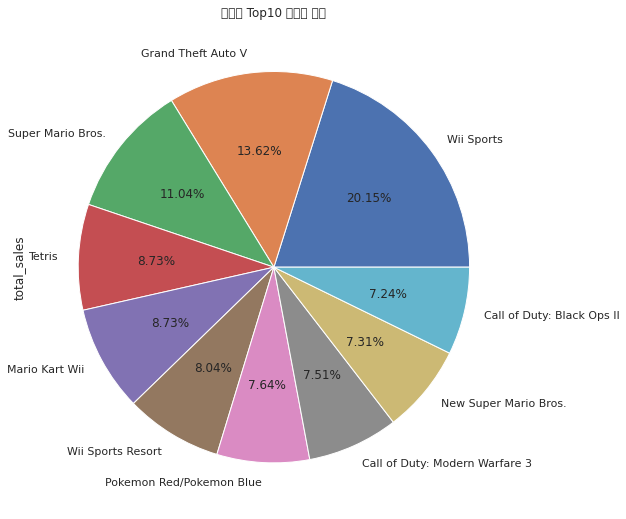

In [33]:
# 이름이 똑같은 게임이라도 플랫폼 별로 나눠서 판매된 게임들이 존재한다는 것을 확인하였다.
# 그래서 전체 게임의 출고량을 파악하기 위해 플랫폼 별 출시현황을 합치기 위해 그룹화를 하여 파이 그래프를 만들었다.
data.groupby(['Name']).sum()['total_sales'].sort_values(ascending = False)[:10].plot(kind='pie',                              # pie chart 출력
                                                                                     figsize=(9, 9),                          # 차트 크기
                                                                                     autopct=lambda p : '{:.2f}%'.format(p))  # 소수점 2자리표현 및 '%' 출력
plt.title('출고량 Top10 장르의 비율')

In [ ]:
data.Platform.value_counts() 

In [ ]:
data.Year.value_counts()

In [ ]:
data.Genre.value_counts()

#pdf1 = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = 'class',    # 행 위치에 들어갈 열
                     columns = 'sex',    # 열 위치에 들어갈 열
                     values = 'age',     # 데이터로 사용할 열
                     aggfunc = 'mean')   # 데이터 집계함수
#pdf1

In [34]:
Genre_Year_table = pd.pivot_table(data[data['Year']<=2020], values = ['total_sales'], index = ['Year'], columns = ['Genre'], aggfunc = 'sum')
Genre_Year_table
# 결측치가 확인되었다. 하지만 시각화하는데 전혀 문제가 없었다.

total_sales                     ...                            
Genre       Action Adventure Fighting  ... Simulation  Sports Strategy
Year                                   ...                            
1980.0        0.34       NaN     0.77  ...        NaN     NaN      NaN
1981.0       14.79       NaN      NaN  ...       0.44    0.78      NaN
1982.0        6.50       NaN      NaN  ...        NaN    1.06      NaN
1983.0        2.86      0.40      NaN  ...        NaN    3.20      NaN
1984.0        1.85       NaN      NaN  ...        NaN    6.17      NaN
1985.0        3.52       NaN     1.05  ...       0.04    1.96      NaN
1986.0       13.74       NaN      NaN  ...        NaN    5.58      NaN
1987.0        1.11      4.38     5.42  ...        NaN    3.71      NaN
1988.0        1.74       NaN      NaN  ...       0.03    3.60      NaN
1989.0        4.65       NaN      NaN  ...        NaN    5.72      NaN
1990.0        6.39       NaN      NaN  ...       1.13    2.11      NaN
1991.0        6.76      2.24     0.39  ...       2.15    2.41     0.94
1992.0        3.84     12.24    15.23  ...       2.14    2.95     0.36
1993.0        1.81      0.07     8.75  ...       0.19    3.18     0.81
1994.0        1.55      3.74     8.47  ...       2.72    8.41     3.57
1995.0        3.58      0.71    14.84  ...       4.17    7.99     6.54
1996.0       20.60      4.18    18.04  ...      11.33   17.42     5.61
1997.0       27.59      4.97    11.80  ...       9.64   30.04     7.72
1998.0       39.41      9.04    31.68  ...       7.11   41.75    13.49
1999.0       27.62      7.61    14.31  ...      11.46   30.21    18.47
2000.0       33.89      2.96    20.26  ...       3.37   41.24     8.52
2001.0       56.68      8.96    18.10  ...      19.54   51.47     7.54
2002.0       86.65     11.07    24.92  ...      10.82   65.31     5.51
2003.0       67.98      2.12    23.79  ...      21.21   55.96     7.95
2004.0       76.15      8.45    16.76  ...      10.89   61.11     7.14
2005.0       85.52      8.53    19.68  ...      49.28   59.53     5.34
2006.0       66.49     11.48    22.53  ...      21.73  136.12     4.23
2007.0      105.99     24.44    17.63  ...      48.85   98.24     9.38
2008.0      135.46     24.91    35.41  ...      46.40   95.24    11.70
2009.0      138.32     20.67    32.18  ...      33.55  138.59    12.51
2010.0      117.50     16.57    14.88  ...      21.90   92.02    13.82
2011.0      119.00     15.88    22.11  ...      15.31   57.06     8.87
2012.0      120.78      5.90     9.53  ...      13.37   30.90     3.33
2013.0      125.21      6.61     7.23  ...       8.68   41.54     6.32
2014.0       99.01      6.09    16.15  ...       5.54   46.64     0.97
2015.0       68.25      8.01     7.78  ...       5.61   41.49     1.82
2016.0       19.84      1.79     3.85  ...       0.39   14.63     0.52
2017.0        0.01       NaN      NaN  ...        NaN     NaN      NaN
2020.0         NaN       NaN      NaN  ...       0.29     NaN      NaN

[39 rows x 12 columns]

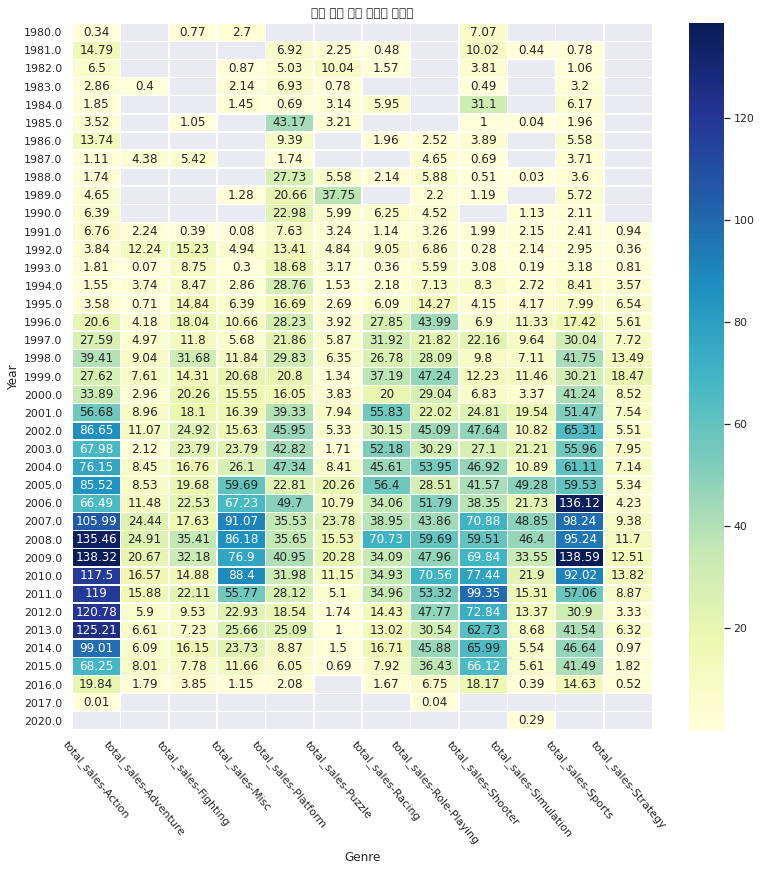

In [35]:
# 키워드 : 상관분석 시각화
plt.subplots(figsize=(13, 13))
sns.heatmap(Genre_Year_table,  
            cmap='YlGnBu', # 파란색과 노란색 계열로 색 변경해줬음. 앞에 그래프와 다른 색을 주고싶었음.
            annot=True, # cell에 실제 값을 표시
            fmt="g",    # 실수 키워드 : 상관분석 시각화
            linewidths=.5)  # cell 사이에 경계선 추가

plt.title('게임 장르 기준 년도별 출고량')
plt.xticks(rotation = -50) # x축 텍스트 회전
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

In [ ]:
# corr 넣어서 상관분석해두자

# 2. 연도별 게임의 트렌드가 있을까?



In [ ]:
# 액션 게임은 2000년대 접어들면서 장르별 게임의 출고량이 많아졌음을 알 수 있다.
# 그렇다면 매년 게임의 출고량은 변화는 어떻게될까? 알아보자

In [ ]:
# x 축은 년도
# y 축은 total_sales
plt.subplots(figsize=(13, 13))

sns.lineplot(data = data, x = 'Year' , y = 'total_sales', palette="Blues_d")

In [ ]:
data['Year'].value_counts()

In [ ]:
data.groupby(['Year']).count().dtypes

In [61]:
data.head()

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,2006.0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,1985.0,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,2008.0,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,2009.0,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,1996.0,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [63]:
data_cross = pd.crosstab(data.Year, data.Genre).reset_index()
data_cross.corr()

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Genre,,,,,,,,,,,,,
Year,1.000000,0.691366,0.586011,0.537135,0.498948,0.385420,0.397332,0.469260,0.692048,0.592982,0.456093,0.529285,0.515083
Action,0.691366,1.000000,0.859695,0.753390,0.814166,0.577267,0.720122,0.688947,0.949789,0.869883,0.752533,0.790499,0.773600
Adventure,0.586011,0.859695,1.000000,0.740005,0.944280,0.466870,0.859767,0.622434,0.910170,0.803253,0.900584,0.830064,0.826466
Fighting,0.537135,0.753390,0.740005,1.000000,0.788879,0.802501,0.792835,0.904424,0.848284,0.896056,0.781710,0.925251,0.896191
Misc,0.498948,0.814166,0.944280,0.788879,1.000000,0.578774,0.941579,0.714673,0.870107,0.857361,0.953031,0.872991,0.901205
Platform,0.385420,0.577267,0.466870,0.802501,0.578774,1.000000,0.550809,0.907223,0.633947,0.838182,0.564951,0.811673,0.682411
Puzzle,0.397332,0.720122,0.859767,0.792835,0.941579,0.550809,1.000000,0.726771,0.802666,0.799475,0.966307,0.860214,0.909422
Racing,0.469260,0.688947,0.622434,0.904424,0.714673,0.907223,0.726771,1.000000,0.750900,0.876327,0.737736,0.931591,0.854622
Role-Playing,0.692048,0.949789,0.910170,0.848284,0.870107,0.633947,0.802666,0.750900,1.000000,0.902598,0.829082,0.866534,0.853135


In [64]:
# cross로 상관분석을 해보자
#이거로 그래프 그리자!!!

In [96]:
#p = data.groupby(['Genre','Year']).sum()['total_sales'].sort_values(ascending = False).reset_index()

In [127]:
p = data.groupby(['Genre','Year']).sum()['total_sales'].reset_index()

In [132]:
p  = pd.DataFrame(p)

cond = (p['Genre'] == 'Action')
p = p[cond]

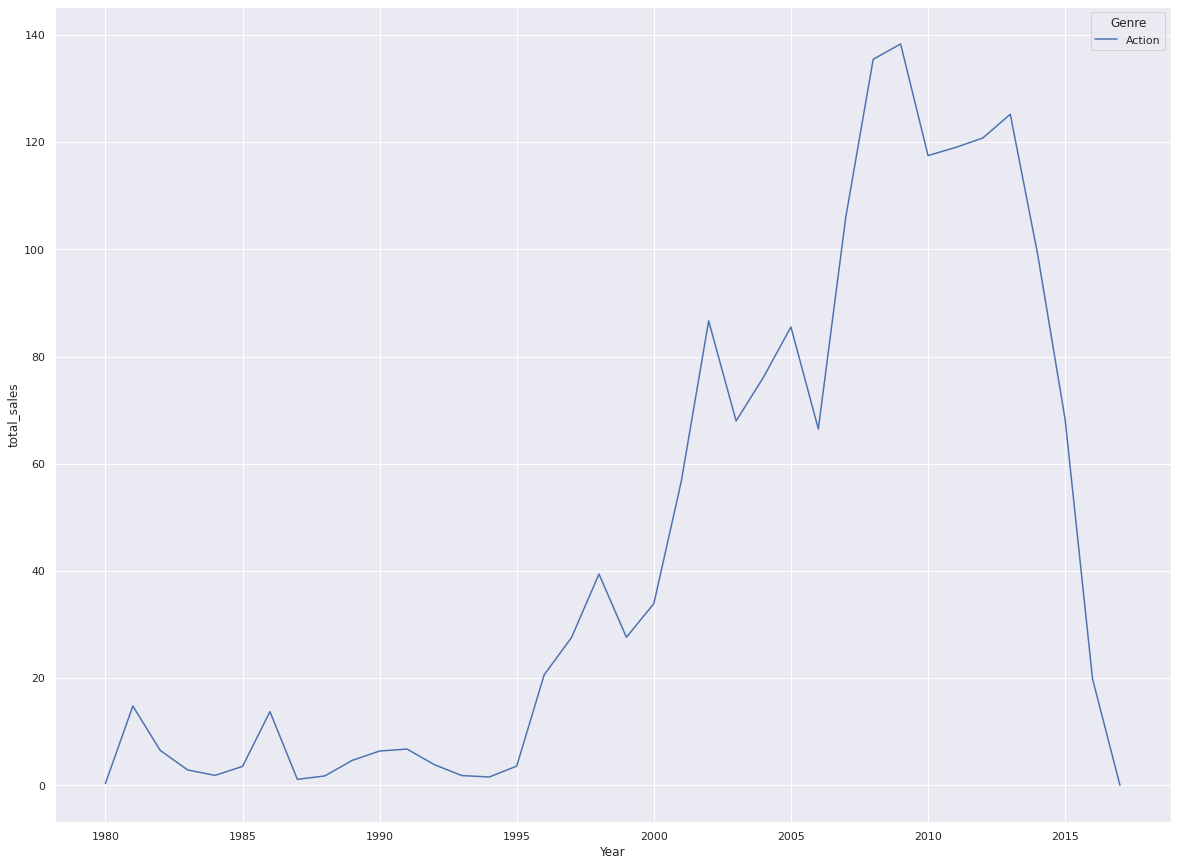

In [133]:
import seaborn as sns
plt.subplots(figsize=(20, 15))
sns.lineplot(data = p, x = 'Year', y = 'total_sales', hue = 'Genre')


In [2]:
data

NameError: ignored